In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
)

In [2]:
# Load Data 
train_df = pd.read_csv("C:\\Users\\Shree\\Github\\Bank Loan Status\\train_ctrUa4K (1).csv")
test_df = pd.read_csv("C:\\Users\\Shree\\Github\\Bank Loan Status\\test_lAUu6dG (1).csv")

In [4]:
# 2. Initial Exploration
print("Train Data shape:", train_df.shape)
print("Train Data columns:", train_df.columns)
print("First 5 rows:\n", train_df.head())

Train Data shape: (614, 13)
Train Data columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
First 5 rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360

In [5]:
print("Missing values:\n", train_df.isnull().sum())

Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
print("Target variable value counts:\n", train_df["Loan_Status"].value_counts())

Target variable value counts:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [7]:
# EDA for all categorical variables
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']:
    print(f"\nValue counts for {col}:")
    print(train_df[col].value_counts())


Value counts for Gender:
Gender
Male      489
Female    112
Name: count, dtype: int64

Value counts for Married:
Married
Yes    398
No     213
Name: count, dtype: int64

Value counts for Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Value counts for Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Value counts for Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Value counts for Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


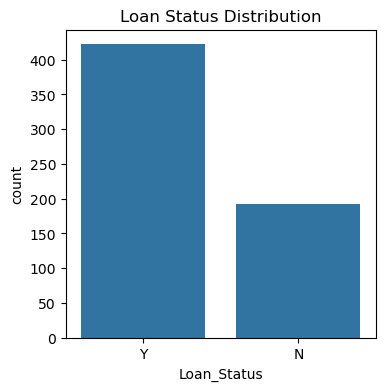

In [8]:
# Data Visualization
plt.figure(figsize=(4,4))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Loan Status Distribution')
plt.savefig("loan_status_distribution.png")
plt.show()

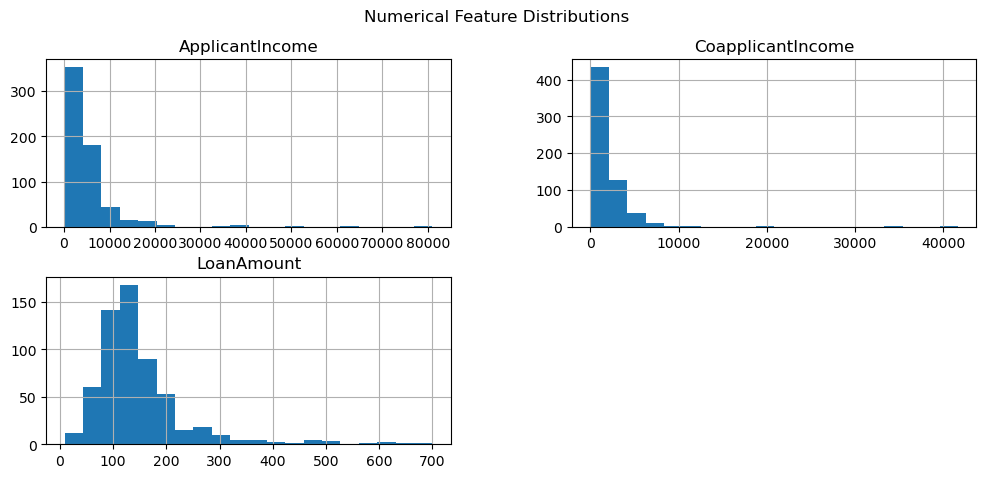

In [9]:
train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(bins=20, figsize=(12,5))
plt.suptitle('Numerical Feature Distributions')
plt.savefig("numerical_distribution.png")
plt.show()

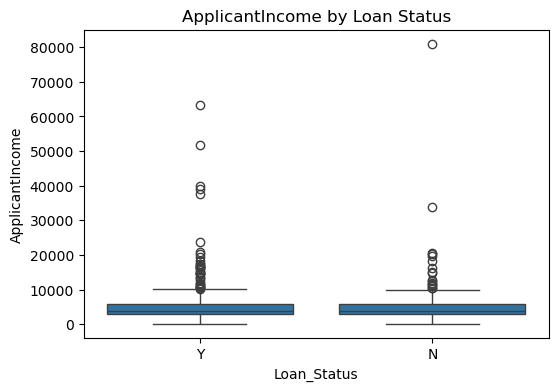

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_df)
plt.title('ApplicantIncome by Loan Status')
plt.savefig("applicant_income_boxplot.png")
plt.show()

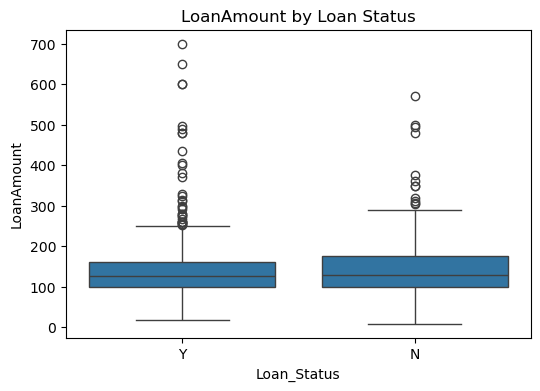

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df)
plt.title('LoanAmount by Loan Status')
plt.savefig("loan_amount_boxplot.png")
plt.show()

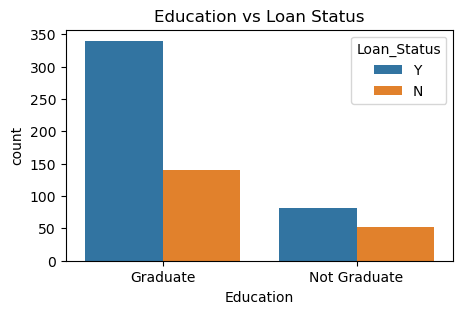

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x='Education', hue='Loan_Status', data=train_df)
plt.title('Education vs Loan Status')
plt.savefig("education_vs_loan_status.png")
plt.show()

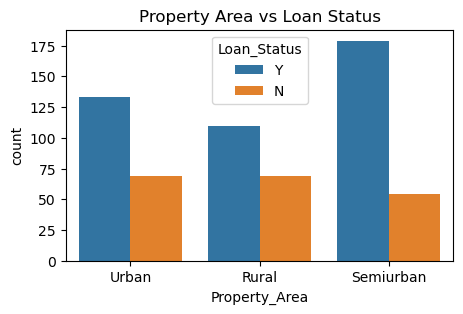

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_df)
plt.title('Property Area vs Loan Status')
plt.savefig("property_area_vs_loan_status.png")
plt.show()

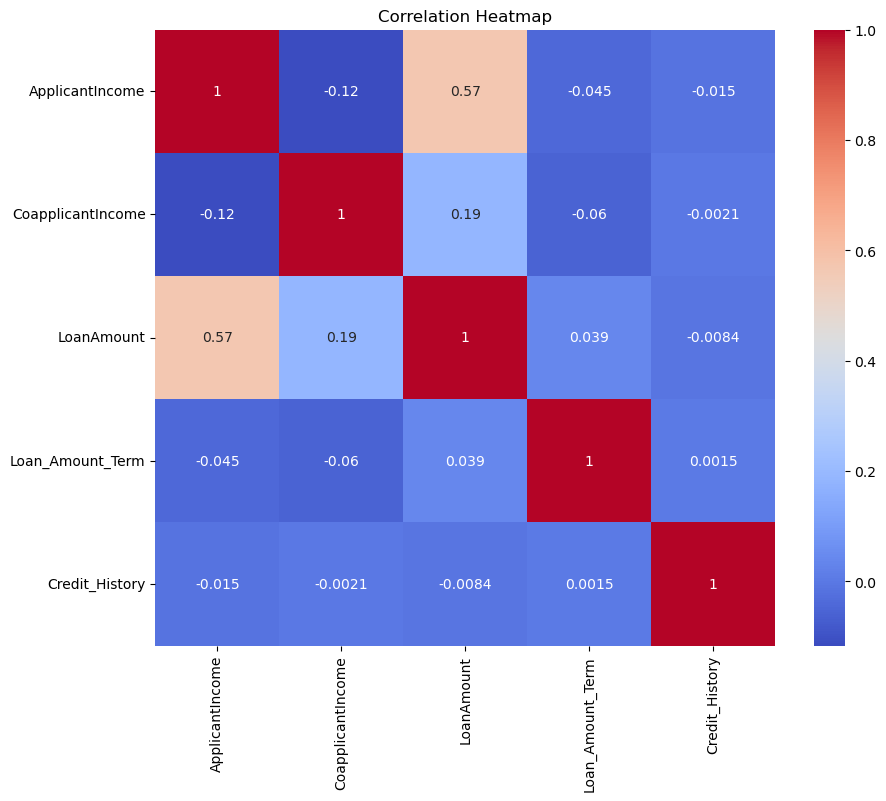

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("correlation_heatmap.png")
plt.show()

In [15]:
# ========== 4. Data Preprocessing ==========
for col in ['Gender', 'Dependents', 'Married', 'Self_Employed']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())

train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0])
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0])

train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0])
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})
test_df['Gender'] = test_df['Gender'].map({'Male': 1, 'Female': 0})

train_df['Married'] = train_df['Married'].map({'Yes': 1, 'No': 0})
test_df['Married'] = test_df['Married'].map({'Yes': 1, 'No': 0})

train_df['Dependents'] = train_df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3}).astype(int)
test_df['Dependents'] = test_df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3}).astype(int)

train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

C:\Users\Shree\AppData\Local\Temp\ipykernel_8292\881953097.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Dependents'] = train_df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3}).astype(int)
C:\Users\Shree\AppData\Local\Temp\ipykernel_8292\881953097.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Dependents'] = test_df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3}).astype(int)


In [16]:
print("Missing values after filling:\n", train_df.isnull().sum())

Missing values after filling:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [17]:
# Select Features & Target
drop_columns = ['Loan_ID', 'Self_Employed', 'Education', 'Property_Area']
features = train_df.drop(columns=drop_columns + ['Loan_Status'])
target = train_df['Loan_Status']
test_features = test_df.drop(columns=drop_columns)

In [18]:
# Train/Validation Split
features_train, features_val, target_train, target_val = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

In [24]:
# Feature Scaling (for Logistic Regression)
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_val_scaled = scaler.transform(features_val)

# Fix: Align columns for test_features before scaling
test_features = test_features[features_train.columns]
test_features_scaled = scaler.transform(test_features)

In [26]:
# Model Training (Logistic Regression)
logreg_model = LogisticRegression(max_iter=2000)
logreg_model.fit(features_train_scaled, target_train)
pred_val_logreg = logreg_model.predict(features_val_scaled)
proba_val_logreg = logreg_model.predict_proba(features_val_scaled)[:,1]

print("\n Logistic Regression ")
print("Accuracy:", accuracy_score(target_val, pred_val_logreg))
print("Precision:", precision_score(target_val, pred_val_logreg))
print("Recall:", recall_score(target_val, pred_val_logreg))
print("F1 Score:", f1_score(target_val, pred_val_logreg))
print("AUC:", roc_auc_score(target_val, proba_val_logreg))


 Logistic Regression 
Accuracy: 0.8617886178861789
Precision: 0.84
Recall: 0.9882352941176471
F1 Score: 0.9081081081081082
AUC: 0.7981424148606812


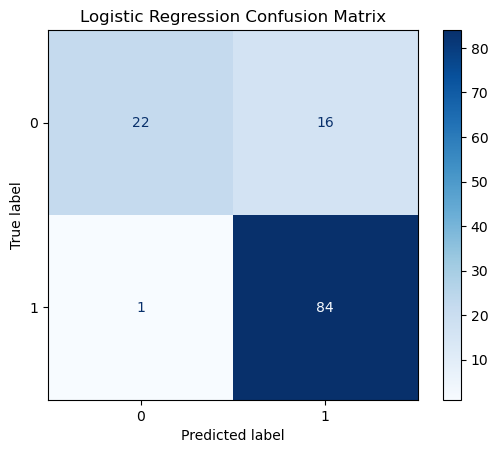

In [30]:
ConfusionMatrixDisplay.from_predictions(target_val, pred_val_logreg, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

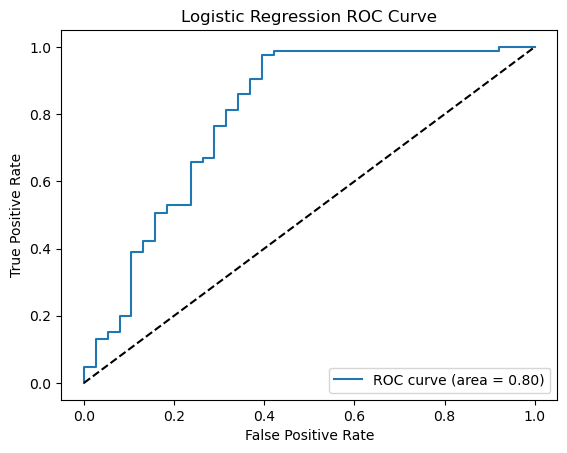

In [31]:
fpr_logreg, tpr_logreg, _ = roc_curve(target_val, proba_val_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label=f"ROC curve (area = {roc_auc_logreg:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
# Model Training (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(features_train, target_train)
pred_val_rf = rf_model.predict(features_val)
proba_val_rf = rf_model.predict_proba(features_val)[:,1]

print("\n Random Forest ")
print("Accuracy:", accuracy_score(target_val, pred_val_rf))
print("Precision:", precision_score(target_val, pred_val_rf))
print("Recall:", recall_score(target_val, pred_val_rf))
print("F1 Score:", f1_score(target_val, pred_val_rf))
print("AUC:", roc_auc_score(target_val, proba_val_rf))


 Random Forest 
Accuracy: 0.7967479674796748
Precision: 0.8260869565217391
Recall: 0.8941176470588236
F1 Score: 0.8587570621468926
AUC: 0.7922600619195046


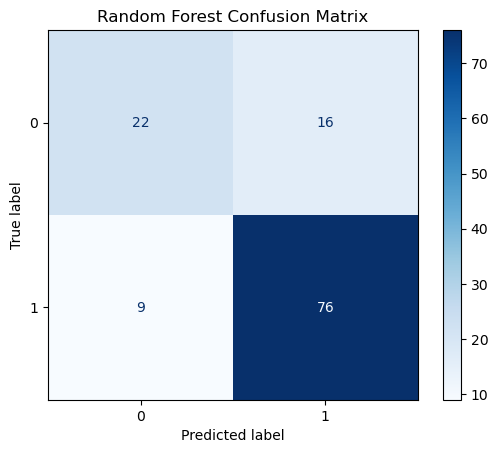

In [32]:
ConfusionMatrixDisplay.from_predictions(target_val, pred_val_rf, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

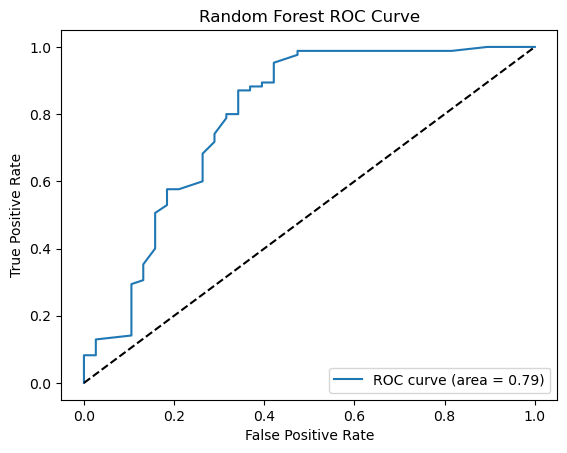

In [33]:
fpr_rf, tpr_rf, _ = roc_curve(target_val, proba_val_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"ROC curve (area = {roc_auc_rf:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Predict on Test Set (Random Forest Best Model)
param_grid = {'n_estimators':[50,100,200], 'max_depth':[3,5,7]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(features_train, target_train)
best_rf_model = grid.best_estimator_
test_predictions = best_rf_model.predict(test_features)

In [29]:
# Print first 10 predictions for quick check
print("First 10 test predictions (as 0/1):", test_predictions[:10])

# Convert 0/1 back to 'Y'/'N' for submission
test_df['Loan_Status_Predicted'] = np.where(test_predictions == 1, 'Y', 'N')
print("First 10 test predictions (as Y/N):", test_df['Loan_Status_Predicted'].head(10).tolist())

First 10 test predictions (as 0/1): [1 1 1 1 1 1 1 0 1 1]
First 10 test predictions (as Y/N): ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y']
